# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

**REMINDER FOR ME :** To run this Jupyter Notebook so it accesses your local GPU, use the following miniconda virtual environment ...

```bash
andrew@andrew-Alienware-Aurora-R5:~/dev/term1/CarND-Traffic-Sign-Classifier-Project$ source activate carnd-term1

(carnd-term1) andrew@andrew-Alienware-Aurora-R5:~/dev/term1/CarND-Traffic-Sign-Classifier-Project$ jupyter notebook Traffic_Sign_Classifier.ipynb

(carnd-term1) andrew@andrew-Alienware-Aurora-R5:~/dev/term1/CarND-Traffic-Sign-Classifier-Project$ conda list | grep -i tensorflow
tensorflow                0.12.1                    <pip>
tensorflow-gpu            0.12.1                    <pip>
```


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("X_test.shape : ", X_test.shape)
print("y_test.shape : ", y_test.shape)

""" Data Check : assert that number of features and labels match. """
assert(len(X_train) == len(y_train))  # 39209.
assert(len(X_test) == len(y_test))  # 12630.

X_test.shape :  (12630, 32, 32, 3)
y_test.shape :  (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
n_classes = len(set(y_train))

print("Number of training examples : ", n_train)
print("Number of testing examples : ", n_test)
print("Shape of a traffic sign colour image : ", image_shape)
print("Number of unique labels : ", n_classes)

Number of training examples :  39209
Number of testing examples :  12630
Shape of a traffic sign colour image :  (32, 32, 3)
Number of unique labels :  43


### 1.1. Visualisation : 1 x image

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Index :  4367
Label : 2
image.shape :  (32, 32, 3)


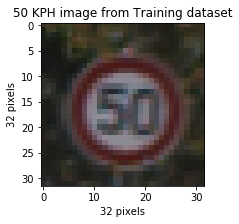

In [3]:
### Data exploration visualization goes here.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
# IMPORTANT : uncomment following line when running in Jupyter Notebook.
%matplotlib inline

#index = random.randint(0, len(X_train))
index = 4367
print("Index : ", index)  # 50 KPH example
print('Label : %d' % (y_train[index]))  # Label index 2

image = X_train[index].squeeze()  # 32 x 32

print("image.shape : ", image.shape)

plt.figure(figsize=(3,3))
plt.title("50 KPH image from Training dataset")
plt.ylabel("32 pixels")
plt.xlabel("32 pixels")
plt.imshow(image)  # IMPORTANT : uncomment when running from Jupyter Notebook


### 1.2. Visualisation : Compare image Python array Vs TensorFlow array

In [4]:
import tensorflow as tf

print("image.shape : ", image.shape)  # (32, 32, 3) aka 50 KPH image from Training dataset
img_tf = tf.Variable(image)

print("img_tf.get_shape().as_list() : ", img_tf.get_shape().as_list())  # [32, 32, 3]

image.shape :  (32, 32, 3)
img_tf.get_shape().as_list() :  [32, 32, 3]


**Pyplot images side by side and compare**

Tensorflow array looks very similar.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


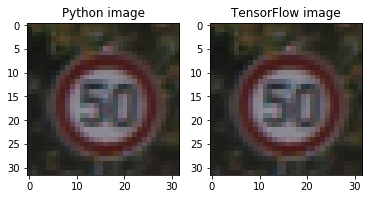

In [5]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
with sess.as_default():
    img_tf_ndarray = img_tf.eval()

fig = plt.figure()

fig.add_subplot(1,2,1)
plt.title("Python image")
plt.imshow(image)
fig.add_subplot(1,2,2)
plt.title("TensorFlow image")
plt.imshow(img_tf_ndarray)

plt.show()  # IMPORTANT : uncomment when running from Jupyter Notebook

In [6]:
"""
How many training labels?
* Export data to play with in a spreadsheet.
* Used Conditional Formatting to simulate a colour heatmap.
"""

from collections import Counter

print("y_train keys : ", Counter(y_train).keys())  # equal to list(set(y_train))
print("y_train count : ", Counter(y_train).values())  # counts the elements' frequency

y_train keys :  dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
y_train count :  dict_values([210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240])


![Signs count](training_dataset_signs_count.png)

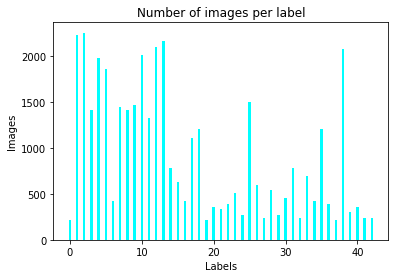

In [7]:
import numpy as np

inputs_per_class = np.bincount(y_train)
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Images')
ax.set_xlabel('Labels')
ax.set_title('Number of images per label')
ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='cyan', label='Inputs per label')
plt.show()  # IMPORTANT : uncomment when running from Jupyter Notebook

In [8]:
print('Preprocessing data...')
# Generate additional data for underrepresented classes
import numpy as np
import scipy.ndimage

train_features = np.array(train['features'])
train_labels = np.array(train['labels'])

X_test = np.array(test['features']) / 255. - 0.5  # Scale and range between -0.5 and 0.5
# y_test = np.array(test['labels'])

inputs_per_label = np.bincount(train_labels)
print("inputs_per_label : ", inputs_per_label)  #
max_inputs = np.max(inputs_per_label)
print("max_inputs : ", max_inputs)  #

print('Generating additional data...')
angles = [-5, 5, -10, 10, -15, 15, -20, 20]
print("len(angles) : ", len(angles))

print("range(len(inputs_per_class)) : ", range(len(inputs_per_label)))  #

for i in range(len(inputs_per_label)):
    input_ratio = min(int(max_inputs / inputs_per_label[i]) - 1, len(angles) - 1)

    if input_ratio <= 1:
        continue

    new_features = []
    new_labels = []
    mask = np.where(train_labels == i)

    for j in range(input_ratio):
        for feature in train_features[mask]:
            new_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
            new_labels.append(i)

    train_features = np.append(train_features, new_features, axis=0)
    # y_train = np.append(y_train, new_labels, axis=0)
    train_labels = np.append(train_labels, new_labels, axis=0)

print("Additional augmented images generated.")


Preprocessing data...
inputs_per_label :  [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
max_inputs :  2250
Generating additional data...
len(angles) :  8
range(len(inputs_per_class)) :  range(0, 43)
Additional augmented images generated.


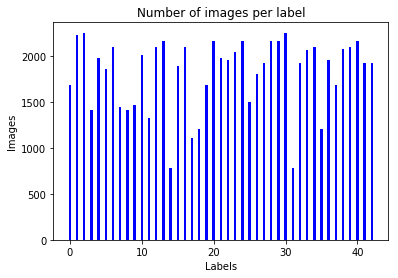

In [10]:
inputs_per_label = np.bincount(train_labels)
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Images')
ax.set_xlabel('Labels')
ax.set_title('Number of images per label')
ax.bar(range(len(inputs_per_label)), inputs_per_label, 1 / 3, color='blue', label='Inputs per label')
plt.show()  # IMPORTANT : uncomment when running from Jupyter Notebook

### 1.2. Visualisation : Colour Vs Grayscale Vs Rotated

In [11]:
import cv2

sample_image_index = 4367  # 50 KPH zone

# Make a copy of that sample image
orig_50kph_colour_image = np.copy(X_train[sample_image_index,...])
print("orig_50kph_colour_image.shape : ", orig_50kph_colour_image.shape)
print('Image label : %d' % (y_train[sample_image_index]))

orig_50kph_colour_image.shape :  (32, 32, 3)
Image label : 2


Instructions for updating:
Use `tf.global_variables_initializer` instead.


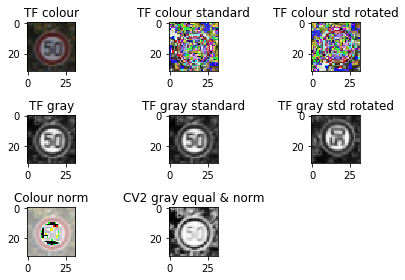

In [12]:
""" TensorFlow Functions """
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
with sess.as_default():
    rgb_image_float_ndarray = tf.image.convert_image_dtype(orig_50kph_colour_image, tf.float32).eval()

    # Standardise the colour image
    tf_colour_image_stdzd_ndarray = tf.image.per_image_standardization(rgb_image_float_ndarray).eval()

    # Convert from colour to gray scale
    tf_image_grayed_ndarray = tf.image.rgb_to_grayscale(rgb_image_float_ndarray, name=None).eval()

    # Standardise the gray image
    tf_gray_image_stdzd_ndarray = tf.image.per_image_standardization(tf_image_grayed_ndarray).eval()

    # Rotate colour and gray images
    colour_rot_cc_90_degrees_ndarray = tf.image.rot90(tf_colour_image_stdzd_ndarray, k=1, name=None).eval()
    gray_rot_cc_90_degrees_ndarray = tf.image.rot90(tf_gray_image_stdzd_ndarray, k=1, name=None).eval()

""" CV2 Functions """
# Convert to grayscale aka reduce 3 channels to 1
gray = cv2.cvtColor(orig_50kph_colour_image, cv2.COLOR_BGR2GRAY)

# Spread pixel distribution to resolve contrast (aka darkness) of some images
eq_gray = cv2.equalizeHist(gray)

""" Normalise """
# Normalise by scaling and ranging
norm_gray = eq_gray / 255. - 0.5
norm_colour = orig_50kph_colour_image / 255. - 0.5

# Visually compare the Normalised image and the TensorFlow Standardised image
fig = plt.figure()

#
fig.add_subplot(3, 3, 1)
plt.title("TF colour")
plt.imshow(img_tf_ndarray)
#
fig.add_subplot(3, 3, 2)
plt.title("TF colour standard")
plt.imshow(tf_colour_image_stdzd_ndarray)
#
fig.add_subplot(3, 3, 3)
plt.title("TF colour std rotated")
plt.imshow(colour_rot_cc_90_degrees_ndarray)
#
fig.add_subplot(3, 3, 4)
plt.title("TF gray")
plt.imshow(tf_image_grayed_ndarray.squeeze(), cmap='gray')
#
fig.add_subplot(3, 3, 5)
plt.title("TF gray standard")
plt.imshow(tf_gray_image_stdzd_ndarray.squeeze(), cmap='gray')
#
fig.add_subplot(3, 3, 6)
plt.title("TF gray std rotated")
plt.imshow(gray_rot_cc_90_degrees_ndarray.squeeze(), cmap='gray')
#
fig.add_subplot(3, 3, 7)
plt.title("Colour norm")
plt.imshow(norm_colour)
#
fig.add_subplot(3, 3, 8)
plt.title("CV2 gray equal & norm")
plt.imshow(norm_gray, cmap='gray')

plt.tight_layout()
plt.show()  # IMPORTANT : uncomment when running from Jupyter Notebook

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### 2.1. Pre-processing : Exploration 1

In [13]:
"""
Normalise colour copy of X_train dataset
* equalise (aka spread-out) pixels, then
* scale and range.
"""
# X_train_copy_colour = np.copy(X_train)
# tmp_colour = []

# for i in range(X_train_copy_colour.shape[0]):
#    norm_colour = X_train_copy_colour[i, ...] / 255. - 0.5
#    tmp_colour.append(norm_colour)

# X_train_colour = np.array(tmp_colour)

y_train = np.copy(train_labels)

X_train_colour = np.copy(train_features)
X_train_colour = X_train_colour / 255. - 0.5  # Scale and range between -0.5 and 0.5
print("X_train_colour.shape : ",
      X_train_colour.shape)  # Training dataset size was (39209, 32, 32, 3), now (78117, 32, 32, 3).

"""
Equalise / Normalise grayscale copy of X_train dataset :
* Convert from colour to grayscale, then
* equalise (aka spread-out) pixels, then
* scale and range.
"""
X_train_copy_gray = np.copy(train_features)
# X_train_copy_gray = X_train_copy_gray / 255. - 0.5
tmp_gray = []

for i in range(X_train_copy_gray.shape[0]):
    gray = cv2.cvtColor(X_train_copy_gray[i, ...], cv2.COLOR_BGR2GRAY)
    eq_gray = cv2.equalizeHist(gray)
    # norm_grey = eq_gray / 255. - 0.5
    norm_grey = eq_gray
    tmp_gray.append(norm_grey)

tmp_gray = np.array(tmp_gray)
X_train_gray = tmp_gray[..., np.newaxis]

print("X_train_gray.shape : ", X_train_gray.shape)  # (39209, 32, 32, 1), now (78117, 32, 32, 1).

""" Convert Test Dataset to Grayscale """
# X_test_copy_gray = np.copy(X_test)
X_test_copy_gray = np.copy(test['features'])
tmp_test_gray = []

for i in range(X_test_copy_gray.shape[0]):
    gray = cv2.cvtColor(X_test_copy_gray[i, ...], cv2.COLOR_BGR2GRAY)
    tmp_test_gray.append(gray)

tmp_test_gray = np.array(tmp_test_gray)
X_test_gray = tmp_test_gray[..., np.newaxis]

print("X_test_gray.shape : ", X_test_gray.shape)  # (39209, 32, 32, 1), now (78117, 32, 32, 1).

X_train_colour.shape :  (78117, 32, 32, 3)
X_train_gray.shape :  (78117, 32, 32, 1)
X_test_gray.shape :  (12630, 32, 32, 1)


### 2.2. Exploration Setup

Abandoned trying to use TensorFlow for image pre-processing as it currenlty only operates on single images aka too slow!

Also will stop using grayscale as they did not perform as well as colour images. See answers to questions below for more details.

### 2.3.Split out Validation dataset

Split out 20% of the training dataset to create a separate validation dataset.

In [14]:
from sklearn.model_selection import train_test_split

""" Split off Validation from X_train_colour """
print("X_train_colour       : %s, y_train       : %s" % (
X_train_colour.shape, y_train.shape))  # X_train : (39209, 32, 32, 3), y_train : (39209,)

X_train_colour_split, X_validation_colour, y_train_split, y_validation = train_test_split(
    X_train_colour,
    y_train,
    test_size=0.20,
    random_state=832289)

print("X_train_colour_split : %s, y_train_split : %s, X_validation_colour : %s, y_validation : %s" % (
X_train_colour_split.shape, y_train_split.shape, X_validation_colour.shape,
y_validation.shape))  # X_train_split : (31367, 32, 32, 3), y_train_split : (31367,), X_validation : (7842, 32, 32, 3), y_validation : (7842,)
print()

""" Split off Validation from X_train_gray """
print("X_train_gray         : %s, y_train       : %s" % (
X_train_gray.shape, y_train.shape))  # X_train : (39209, 32, 32, 1), y_train : (39209,)

# Grayscale Training and Validation datasets
X_train_gray_split, X_validation_gray, y_train_split, y_validation = train_test_split(
    X_train_gray,
    y_train,
    test_size=0.20,
    random_state=832289)

print("X_train_gray_split   : %s, y_train_split : %s, X_validation_gray   : %s, y_validation : %s" % (
X_train_gray_split.shape, y_train_split.shape, X_validation_gray.shape,
y_validation.shape))  # X_train_split : (31367, 32, 32, 3), y_train_split : (31367,), X_validation : (7842, 32, 32, 3), y_validation : (7842,)


X_train_colour       : (78117, 32, 32, 3), y_train       : (78117,)
X_train_colour_split : (62493, 32, 32, 3), y_train_split : (62493,), X_validation_colour : (15624, 32, 32, 3), y_validation : (15624,)

X_train_gray         : (78117, 32, 32, 1), y_train       : (78117,)
X_train_gray_split   : (62493, 32, 32, 1), y_train_split : (62493,), X_validation_gray   : (15624, 32, 32, 1), y_validation : (15624,)


### 2.4. Model Architecture Tests

#### Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [15]:
import tensorflow as tf

""" Model 1 Exploration 0.1 : Colour Images Un-preprocessed """
#EPOCHS = 15  # Validation Accuracy = 0.961
#BATCH_SIZE = 128

""" Model 1 Exploration 1.1 : Colour Images Normalised """
#EPOCHS = 15  # Validation Accuracy = [0.981 | 0.973 | 0.978 | 0.975]
#EPOCHS = 44  # Validation Accuracy = 0.986
#EPOCHS = 150  # Validation Accuracy = 0.991, but overfitting from epoch 44 onwards!
#BATCH_SIZE = 128

""" Model 1 Exploration 1.2 : Grayscale Images CV2 Grayscaled, CV2 Equalised, Normalised """
#EPOCHS = 15  # Validation Accuracy = 0.961
#BATCH_SIZE = 128

""" Model 2 Exploration 2.1 : Apply Dropout """
#EPOCHS = 10  # Validation Accuracy = ?
#EPOCHS = 15  # Validation Accuracy = 0.943
#EPOCHS = 50  # Validation Accuracy = 0.963
#EPOCHS = 150  # Validation Accuracy = [0.976 | 0.980], Test Accuracy = [? | 0.888]
#EPOCHS = 1000  # Validation Accuracy = [0.981], Test Accuracy = [0.884]. NOTE : takes ~=25 mins to loop through.
#BATCH_SIZE = 128
#dropout = 0.75 # Dropout, probability to keep units

""" Model 3 Exploration 3.1 : Add 1 x Convolutional Layer, Keep 3 Fully Connected (aka classifier) Layers """
#EPOCHS = 10  # Validation Accuracy = 0.831, Test Accuracy = 0.673
#EPOCHS = 1000  # Validation Accuracy = 0.964, Test Accuracy = 0.729  # Model 3.1 NOTE : takes ~=25 mins to loop through.
#BATCH_SIZE = 128
#dropout = 0.75  # Dropout, probability to keep units

""" Model 3 Exploration 3.2 : Keep only 1 Fully Connected (aka classifier) Layers """
#EPOCHS = 10  # Validation Accuracy = 0.616, Test Accuracy = 0.488
#EPOCHS = 1000  # Validation Accuracy = 0.870, Test Accuracy = 0.700  # Model 3.2 NOTE : takes ~=24 mins to loop through.
#BATCH_SIZE = 128
#dropout = 0.75  # Dropout, probability to keep units

""" Model 3 Exploration 3.3 : Add Augmented Data, Re-run Model 3.1 """
#EPOCHS = 10  # Validation Accuracy = 0.909, Test Accuracy = 0.723
#EPOCHS = 100  # Validation Accuracy = 0.???, Test Accuracy = 0.???
#EPOCHS = 500  # Validation Accuracy = 0.970, Test Accuracy = 0.703
#EPOCHS = 1000  # Validation Accuracy = 0.???, Test Accuracy = 0.???  # Model 3.1 NOTE : takes ~=25 mins to loop through.
#BATCH_SIZE = 128
#dropout = 0.75  # Dropout, probability to keep units

""" Model 3 Exploration 3.4 : Add Augmented Data, Reduce Learning Rate 0.0009, Reduce Dropout 0.5, run Model 3.1 """
#EPOCHS = 10  # Validation Accuracy = 0.692, Test Accuracy = 0.443
#EPOCHS = 100  # Validation Accuracy = 0.962, Test Accuracy = 0.728
#BATCH_SIZE = 100
#BATCH_SIZE = 128
#BATCH_SIZE = 100  # Validation Accuracy = 0.900, Test Accuracy = 0.645
#rate = 0.0009  # Validation Accuracy = 0.???, Test Accuracy = 0.???
#rate = 0.001  # Validation Accuracy = 0.992, Test Accuracy = 0.757
#dropout = 0.50  # Dropout, probability to keep units  # Validation Accuracy = 0.992, Test Accuracy = 0.881
#dropout = 0.750  # Dropout, probability to keep units

""" Model 4 Exploration 4.1 : Sermanet_LeNet ; Add Normalised / Augmented Data, Reduce Learning Rate 0.0009, Reduced Dropout 0.5 """
#EPOCHS = 10  # Validation Accuracy = 0.989, Test Accuracy = 0.756
#EPOCHS = 100  # Validation Accuracy = 0.962, Test Accuracy = 0.728
#BATCH_SIZE = 100
#BATCH_SIZE = 128
#BATCH_SIZE = 100  # Validation Accuracy = 0.900, Test Accuracy = 0.645
#rate = 0.0009  # Validation Accuracy = 0.998, Test Accuracy = 0.896
#rate = 0.001  # Validation Accuracy = 0.992, Test Accuracy = 0.757
#dropout = 0.50  # Dropout, probability to keep units  # Validation Accuracy = 0.992, Test Accuracy = 0.881
#dropout = 0.750  # Dropout, probability to keep units

""" Model 4 Exploration 4.2 : Sermanet_LeNet ; Grayscaled Vs Colour, Normalised / Augmented Data, Increased Learning Rate 0.0011, Reduced Dropout 0.5 """
#EPOCHS = 10
#EPOCHS = 30
#EPOCHS = 50
#EPOCHS = 68
EPOCHS = 100  # but observed EPOCH = 96 -> Validation Accuracy = 0.995, Test Accuracy = 0.935
#BATCH_SIZE = 100  # Validation Accuracy = 0.???, Test Accuracy = 0.???
BATCH_SIZE = 128
#BATCH_SIZE = 256  # Validation Accuracy = 0.???, Test Accuracy = 0.???
#rate = 0.005  # Validation Accuracy = 0.986, Test Accuracy = 0.777  # Epochs = 10, Batch size = 100, Learning rate = 0.005, Dropout = 0.5
#rate = 0.002  # Validation Accuracy = 0.???, Test Accuracy = 0.???
#rate = 0.001  # Validation Accuracy = 0.995, Test Accuracy = 0.915  # Epochs = 100, Batch size = 125, Learning rate = 0.001, Dropout = 0.5, Colour Test
#rate = 0.001  # Validation Accuracy = 0., Test Accuracy = 0.  # Epochs = 68, Batch size = 125, Learning rate = 0.001, Dropout = 0.5, Colour Test
rate = 0.0011  # Validation Accuracy = 0.994, Test Accuracy = 0.911  # Epochs = 100, Batch size = 125, Learning rate = 0.0011, Dropout = 0.5, Colour Test
#rate = 0.00095  # Validation Accuracy = 0.996, Test Accuracy = 0.783  # Epochs = 50, Batch size = 125, Learning rate = 0.00095, Dropout = 0.5, Grayscale Test
#rate = 0.0009  # Validation Accuracy = 0.991, Test Accuracy = 0.858  # Epochs = 50, Batch size = 125, Learning rate = 0.0009, Dropout = 0.5, Grayscale Test
#rate = 0.0009  # Validation Accuracy = 0.998, Test Accuracy = 0.833  # Epochs = 50, Batch size = 125, Learning rate = 0.0009, Dropout = 0.5, Colour Test
#rate = 0.0008  # Validation Accuracy = 0.995, Test Accuracy = 0.680  # Epochs = 50, Batch size = 125, Learning rate = 0.0008, Dropout = 0.5, Grayscale Test
dropout = 0.50  # Dropout, probability to keep units  # Validation Accuracy = 0.???, Test Accuracy = 0.???
#dropout = 0.750  # Dropout, probability to keep units  # Validation Accuracy = 0.???, Test Accuracy = 0.???

print()

In [16]:
def variable_summaries(var):
    """
    Attach a lot of summaries to a Tensor (for TensorBoard visualization).
    """
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)


**'Switch' Between Training and Testing**

In [17]:
# explore = "TRAIN_MODEL"  # constant used in if statements
explore = "TEST_MODEL_ON_NEW_IMAGES"  # constant used in if statements

### Model 4 : Sermanet / LeNet

In [18]:
def Sermanet_LeNet(x):
    """
    Model 4
    Implementation of their Traffic Sign Classification CNN. See http://yann.lecun.com/exdb/publis/index.html

    :param x: images
    :return: raw prediction values aka logits
    """
    from tensorflow.contrib.layers import flatten

    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma), name="W1")  # Colour images
    # W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma), name="W1")  # Grayscale images
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:", x.get_shape())

    # Activation.
    x = tf.nn.relu(x)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x

    # Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)

    # Activation.
    x = tf.nn.relu(x)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x

    # Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean=mu, stddev=sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)

    # Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:", layer2flat.get_shape())

    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:", xflat.get_shape())

    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:", x.get_shape())

    # Dropout aka only when want to explore during TRAIN_MODEL, not when TEST_MODEL_ON_NEW_IMAGES
    if explore == "TRAIN_MODEL":
        x = tf.nn.dropout(x, keep_prob)

    # Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean=mu, stddev=sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")
    logits = tf.add(tf.matmul(x, W4), b4)

    return logits


#### Features and Labels
Train LeNet to classify [German Traffic Signs](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [19]:
""" Model 1.1 : Colour and Colour Normalised """
x = tf.placeholder(tf.float32, (None, 32, 32, 3))  # Colour images
""" Model 1.1 : CV2 grayscaled, CV2 equilised, Normalised """
# x = tf.placeholder(tf.float32, (None, 32, 32, 1))  # Grayscale images

y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

""" Model 2.0, Model 3.0, Model 4.0 : Apply Dropout after each max pooling operation """
keep_prob = tf.placeholder(tf.float32)  # Dropout (aka the keep probability)
print()

#### Training Pipeline
Create a training pipeline that uses the model to classify German Traffic Sign data.

In [20]:
logits = Sermanet_LeNet(x)

with tf.name_scope('cross_entropy'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    with tf.name_scope('total'):
        loss_operation = tf.reduce_mean(cross_entropy)
tf.summary.scalar('loss_operation', loss_operation)

with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=rate)
    training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [21]:
with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    with tf.name_scope('accuracy'):
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar('accuracy', accuracy_operation)
saver = tf.train.Saver()

# Merge all the summaries and write them out to ./lenet_logs (by default)
merged = tf.summary.merge_all()
train_writer = tf.train.SummaryWriter('./lenet_logs/train',
                                      sess.graph)
test_writer = tf.train.SummaryWriter('./lenet_logs/test')
# tf.global_variables_initializer().run()
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
with sess.as_default():
    tf.global_variables_initializer().run()

Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [22]:
def evaluate(X_data, y_data):
    """
    Evaluates the accuracy of a models predictions given a set of images and their corresponding labels.

    :param X_data: images
    :param y_data: labels
    :return:  0 <= decimal <= 1
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        # accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})  # Model 1 : Sermanet_LeNet-5
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})  # Model 2, 3, 4 : Dropout
        total_accuracy += (accuracy * len(batch_x))

    return total_accuracy / num_examples


### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [23]:
if explore == "TRAIN_MODEL":
    import time
    from sklearn.utils import shuffle

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        num_examples = len(X_train_colour_split)  # Colour images
        # num_examples = len(X_train_gray_split)  # Grayscale images

        print("Training...")
        logs_path = './lenet_logs'
        writer = tf.train.SummaryWriter(logs_path, graph=tf.get_default_graph())  # for use by TensorBoard
        print()

        startTime = time.time()

        for i in range(EPOCHS):
            X_train_shuffled, y_train_shuffled = shuffle(X_train_colour_split, y_train_split)  # Colour images
            # X_train_shuffled, y_train_shuffled = shuffle(X_train_gray_split, y_train_split)  # Grayscale images
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_shuffled[offset:end], y_train_shuffled[offset:end]
                # sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})  # Model 1 : Sermanet_LeNet-5
                summary = sess.run(training_operation,
                                   feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})  # Model 2, 3, 4 : Dropout
                train_writer.add_summary(summary, offset)

            validation_accuracy = evaluate(X_validation_colour, y_validation)  # Colour images
            # validation_accuracy = evaluate(X_validation_gray, y_validation)  # Grayscale images

            print("EPOCH {} ...".format(i + 1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

            # How does this trained model perform when classifying the test dataset?
            test_accuracy = evaluate(X_test, y_test)  # Colour images
            # test_accuracy = evaluate(X_test_gray, y_test)  # Grayscale images
            print("Test Accuracy = {:.3f}".format(test_accuracy))
            print()

        endTime = time.time()
        print('%s seconds to Train / Validate model, then Test accuracy .' % (endTime - startTime))

        # saver.save(sess, 'lenet')
        saver.save(sess, 'model4.ckpt')
        print("Model saved")


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

1. **TensorFlow API's Vs CV2 libraries + Scaling**
    1. I wanted to learn the TensorFlow API's as part of this project so started by trying to use these to pre-process all data. Soon realised that the TensorFlow functions (as of r0.12) only process single images and is too slown to loop through ~39K images (approximately 8 hours 20 minutes). Captured the single image exploration results in section "1.2. Visualisation : Colour Vs Grayscale Vs Rotated", then continued with CV2 / Scaling approach.
1. **Exploration 1 : Colour Vs Grayscale**
    1. Wanted to run the LeNet-5 model (and any future model) against both colour and grayscale images (research papers seem to favour this) to compare the accuracy, so pre-processed two datasets. See section "2.1. Pre-processing : Exploration 1". The reasons for this were ...
        1. ***Expected Improved Training Efficiency*** : it should be faster to process 1 (gray, pixel intensity) instead of 3 (Red, Green, Blue) channels and require less memory.
            1. ***Result*** : did not notice any significant improvement of grayscale over colour efficiency.
        1. ***Expected Reduced Model Accuracy Using Grayscale *** : I wanted to see if a loss in features (channels) would have a significant impact on model performance or not.
            1. ***Result*** : grayscale image validation accuracy was less than colour normalised but interestingly they had similar validation accuracy to the unprocessed colour images. 

![colour_norm_vs_cv2_gray_cv2_equalisation_norm](colour_norm_vs_cv2_gray_cv2_equalisation_norm.png)

- **Equalised the image pixels**
    - As brighter images will have their pixel intensity values grouped in higher ranges and darker images grouped into lower, the cv2.equalizeHist(image) function will spread them out, making the image dataset contrast more consistent.

![Histogram Equalisation](histogram_equalisation.png)

- **Divided by 255. and subtract 0.5**
    - Scales pixel values into the range -0.5 to 0.5 which is commonly understood to improve model performance significantly. 
    - Applied to both Training and Test datasets.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

- **Split 20% off for Validation** from the original Training dataset after first having pre-processed it (see "Exploration 1 : Colour Vs Grayscale" above). This proportion was suggested as best practice by David Silver (Udacity).
- **Augmented and Generated Training data**
    - Converted colour images to grayscale for testing in different models.
    - Used scipy.ndimage.rotate function to generate new training set images rotated by -5, 5, -10, 10, -15, 15, -20, 20 degrees. This helped to normalise the distribution of training images across the under-represented labels.
- **Ran Model 1 (LeNet-5)** against 3 datasets over 15 epochs (cycles) with image batch processing size of 128  and the Validation accuracy results recorded.
    - Model 1 Exploration 0.1 : **Colour Images Un-preprocessed**
        - Validation Accuracy = **0.961**
    - Model 1 Exploration 1.1 : **Colour Images Normalised**
        - Validation Accuracy = [**0.981** | 0.973 | 0.978 | 0.975]
        - *Note : the 3 additional figures appended above are from subsequent runs and recorded for my interest.*
        - ***WARNING*** : Overfitting will occur on higher epochs as no regularisation applied in model 1!
    - Model 1 Exploration 1.2 : **Grayscale Images CV2 Grayscaled, CV2 Equalised, Normalised**
        - Validation Accuracy = **0.961**


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


***Model 4*** : Sermanet_LeNet ; Colour, Normalised / Augmented Data, Increased Learning Rate 0.0011, Reduced Dropout 0.5

![model_4_architecture.png](model_4_architecture.png)

1. ![model4_1](model4_1.png)
1. ![model4_2](model4_2.png)
1. ![model4_3](model4_3.png)
1. ![model4_4](model4_4.png)
1. ![model4_5](model4_5.png)
1. ![model4_6](model4_6.png)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


1. **Learning rate** : 0.0011 adjusted by trial and error. This is used by the optimiser.
1. **Optimiser** : called TensorFlow's AdamOptimiser function.
1. **Batch size** : 128.
1. **Epochs** : 100 adjusted by trial and error.
1. **Dropouts** : 0.5 adjusted by trial and error. This is the % of randomly ignored neurons.
1. **Hyperparameters** : the tf.truncated_normal initialiser generates a random distribution with a given mean and standard deviation ...
    1. mean = mu = 0
    1. standard deviation = sigma = 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

#### Trial & Error Around LeNet-5 & Sermanet_LeNet####
Convolutional Neural Networks have proven themselves to be a good tool for image classification. Given that the Validation accuracy was 0.961 on the 1st training run (see "Model 1 Exploration 0.1 : Colour Images Un-preprocessed") using an unprocessed image dataset and the default LeNet-5 architecture configuration, then I believed this would be a good point to start my trial & error exploration.
    
I first tried using various functions to pre-process the images ; TensorFlow (standardisation and rotation), CV2 (grayscaling and equalisation) and scaling.

![tensorflow_cv2_normalised_comparisons.png](tensorflow_cv2_normalised_comparisons.png)

The 'error' soon arose when I tried to loop through ~39K images and apply Tensorflow standardisation of the colour images and found it to be very slow. I recorded the time it took to process 100 images and extrapolated that and found it would take approximately 8 hours 20 minutes to pre-process.
    
Next, looking to trial 'pre-processing' and 'efficiency' I trained the LeNet-5 ("Model 1") on pre-processed colour images (see "Model 1 Exploration 1.1 : Colour Images Normalised") and then the grayscale pre-processed images (see "Model 1 Exploration 1.2 : Grayscale Images CV2 Grayscaled, CV2 Equalised, Normalised"), and found the Validation accuracy of the pre-processed colour images to be signicantly better.
    
To fully train Model 1 across many epochs while avoiding overfitting to the training dataset and resulting in poor generalisation, I slightly altered it by trialing Dropouts at the end of the 2 convolution layers (see "Model 2 : LeNet-5 with Dropout Regularisation and Higher Epochs").

Even though the Validation Accuracy was > 98%, the initial Test Validation (sneek peek) would never go above ~= 88% even after adding a 3rd convolution layer to the original model. I needed to find a new model ("Model 4") to ensure Test Accuracy would be > 90%. The "Pierre Sermanet and Yann LeCun: Traffic Sign Recognition with Multi-Scale Convolutional Networks" model resulted in a Test Accuracy score of 93.5% at Epoch 96 (see http://yann.lecun.com/exdb/publis/index.html).

![epoch_100_94.8_test_accuracy.png](epoch_100_94.8_test_accuracy.png)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [24]:
def get_top_predictions(X, k=5):
    """
    Returns the models top 5 predictions for the given images.

    :param X: Images
    :param k: Top k predictions
    :return: array of top predictions
    """
    import os

    # Build the graph
    graph = tf.Graph()
    with graph.as_default():
        tf_x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
        predictions = tf.nn.softmax(Sermanet_LeNet(tf_x))
        # print("type(predictions) : ", type(predictions))  # <class 'tensorflow.python.framework.ops.Tensor'>
        # print("predictions.get_shape() : ", predictions.get_shape())
        top_k_predictions = tf.nn.top_k(predictions, k)
        # print("type(top_k_predictions) : ", type(top_k_predictions))  # <class 'tensorflow.python.ops.gen_nn_ops.TopKV2'>

    with tf.Session(graph=graph) as session:
        session.run(tf.global_variables_initializer())
        tf.train.Saver().restore(session, os.getcwd() + "/" + "model4.ckpt")
        [p] = session.run([top_k_predictions], feed_dict={tf_x: X})
        #print("p : ", p)

    return np.array(p)


In [25]:
def show_image_and_models_confidence(x, predictions, index):
    """
    Shows original image and models level of confidence as a horizontal bar for the top 5 predictions.

    :param x: images
    :param predictions: top 5 predictions
    :param index: image index
    """
    import matplotlib.gridspec as gridspec
    from skimage import io
    import os

    original = io.imread(os.getcwd() + '/test_images/' + "image_{0:0}".format(index + 1) + '.png')
    #print("original.shape : ", original.shape)

    preprocessed = x[index]
    #print("preprocessed.shape : ", preprocessed.shape)  # (32, 32, 3)

    # Prepare the grid
    plt.figure(figsize=(6, 2))
    gridspec.GridSpec(1, 2)

    # Plot original image
    plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
    plt.imshow(original)
    plt.title("original")
    plt.axis('off')

    # Plot predictions
    plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
    plt.barh(np.arange(5) + .5, predictions[0][index], align='center')
    plt.yticks(np.arange(5) + .5, signnames[predictions[1][index].astype(int)])
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off',
                    labelbottom='off')

    plt.show()


In [26]:
def extract_transform_label_new_images():
    """
    Extract .png images from directory and transform. Provide their respective labels.

    :return: images array and labels array
    """
    from skimage import io
    from skimage import transform
    import os
    # Load images
    x_custom = np.empty([0, 32, 32, 3], dtype=np.int32)
    path = './test_images/'
    for new_i in os.listdir(path):
        new_image = io.imread(path + new_i)
        #print("image.shape : ", image.shape)  # (133, 133, 3)
        img = np.copy(new_image)
        img_transformed = transform.resize(img, (32, 32, 3))
        #print("img_transformed.shape : ", img_transformed.shape)
        #print("x_custom.shape : ", x_custom.shape)  # (0, 32, 32, 3)
        x_custom = np.append(x_custom, [img_transformed], axis=0)
        #print("x_custom.shape : ", x_custom.shape)

    # Provide labels for images:
    y_custom = np.array([
        8,  # 120kph
        1,  # 30kph
        2,  # 50kph
        17,  # No entry
        14,  # Stop
        13  # Yield
    ])
    return x_custom, y_custom


In [27]:
def preprocess_all_images(x):
    """
    Scale and range new images.

    :param x: images
    :return: preprocessed images
    """
    x_processed = (x / 255. - 0.5).astype(np.float32)  # Scale and range between -0.5 and 0.5

    return x_processed


In [28]:
def show_preprocessed_new_images():
    """
    Uses CV2 for quick visualisation of preprocessed new images.
    """
    global image, fig, i
    import os
    import matplotlib.pyplot as plt
    import cv2
    import numpy as np
    new_images = []
    path = './test_images/'
    for image in os.listdir(path):
        img = cv2.imread(path + image)
        img = img / 255. - 0.5
        # print("new img shape after scaling : ", img.shape)  #
        # print("new img array after scaling : ", img)
        img = cv2.resize(img, (32, 32))
        new_images.append(img)
    new_images = np.array(new_images, dtype=np.float32)
    # Plot the new test images
    fig = plt.figure()
    for i, image in enumerate(new_images):
        grid = plt.subplot(2, 3, i + 1)
        grid.imshow(image[..., 0])
    plt.tight_layout()
    plt.show()

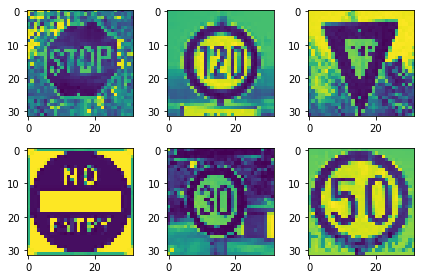

In [29]:
show_preprocessed_new_images()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Test Accuracy On New Images = 0.000
layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)
Actual label :  Speed limit (120km/h)


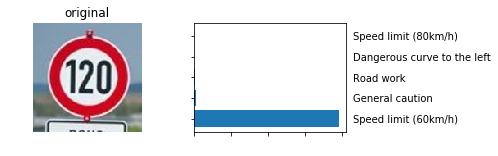

---------------------------------------------------------------------------------------------------

Actual label :  Speed limit (30km/h)


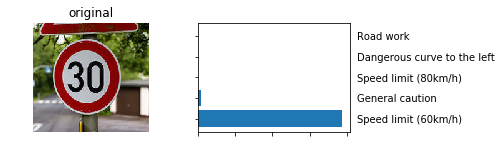

---------------------------------------------------------------------------------------------------

Actual label :  Speed limit (50km/h)


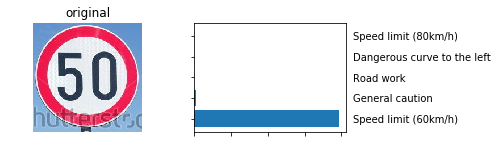

---------------------------------------------------------------------------------------------------

Actual label :  No entry


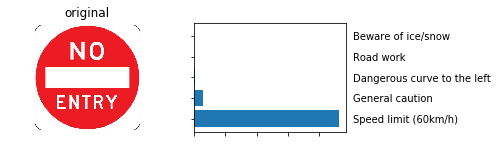

---------------------------------------------------------------------------------------------------

Actual label :  Stop


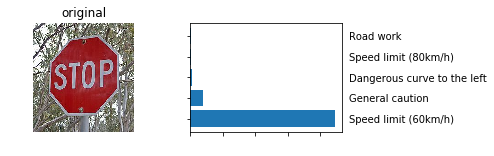

---------------------------------------------------------------------------------------------------

Actual label :  Yield


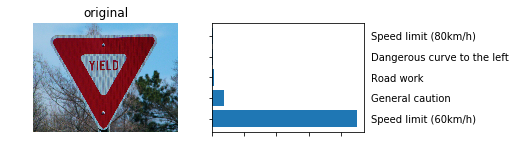

---------------------------------------------------------------------------------------------------



In [30]:
if explore == "TEST_MODEL_ON_NEW_IMAGES":  # aka don't retrain the model, skip to load model and evaluate
    # -----------------------------------------------
    from pandas.io.parsers import read_csv

    signnames = read_csv("signnames.csv").values[:, 1]
    # ----------------------------------------
    x_custom_new_images, y_custom_new_images_labels = extract_transform_label_new_images()

    x_preprocessed_new_images = preprocess_all_images(x_custom_new_images)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        test_accuracy = evaluate(x_preprocessed_new_images, y_custom_new_images_labels)
        print("Test Accuracy On New Images = {:.3f}".format(test_accuracy))  # 0.167 :(

    predictions = get_top_predictions(x_preprocessed_new_images)
    # ------------------------------------------------
    # For every example plot original image and model predictions.
    for i in range(6):
        print("Actual label : ",
              signnames[y_custom_new_images_labels[i]] if y_custom_new_images_labels[i] != 99 else "None")
        show_image_and_models_confidence(x_preprocessed_new_images, predictions, i)
        print("---------------------------------------------------------------------------------------------------\n")
        

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The above 5 candidates were downloaded from the internet.

Comparing say, the downloaded 50 KPH zone sign image with that from the training dataset, there is an observable  difference in the hue, saturation and sharpness levels.  

![kph_50_from_internet.png](kph_50_from_internet.png) ![kph_50_image_from_training_set.png](kph_50_image_from_training_set.png)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Surprisingly not. It is 0% accurate, using the rough calculation described in Question 7 statement above.

When I run the model using a stand-alone script, the calculated accuracy is 16.7%.

![new_images_prediction_accuracy_0_167.png](new_images_prediction_accuracy_0_167.png)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The certainty of the models predictions was strongly in favour of all new images being a "60" KPH zone sign.

This was particularly true for the speed zone signs "120", "30" and "50".

There was a small level of uncertainty recorded for the non-numeric signs "No Entry", "Stop" and "Yield".

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.